<a href="https://colab.research.google.com/github/pegahahadian/omics/blob/main/DeSeq2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("DESeq2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.15 (BiocManager 1.30.18), R 4.2.0 (2022-04-22)

Installing package(s) 'BiocVersion', 'DESeq2'

also installing the dependencies ‘bitops’, ‘formatR’, ‘plogr’, ‘png’, ‘Biostrings’, ‘RCurl’, ‘GenomeInfoDbData’, ‘zlibbioc’, ‘matrixStats’, ‘lambda.r’, ‘futile.options’, ‘RSQLite’, ‘KEGGREST’, ‘XML’, ‘xtable’, ‘GenomeInfoDb’, ‘XVector’, ‘MatrixGenerics’, ‘DelayedArray’, ‘futile.logger’, ‘snow’, ‘BH’, ‘AnnotationDbi’, ‘annotate’, ‘S4Vectors’, ‘IRanges’, ‘GenomicRanges’, ‘SummarizedExperiment’, ‘BiocGenerics’, ‘Biobase’, ‘BiocParallel’, ‘genefilter’, ‘locfit’, ‘geneplotter’, ‘Rcpp’, ‘RcppArmadillo’




**Import DESeq2 library in R**

In [ ]:
library("DESeq2")

**Load gene(/transcript) count matrix and labels**

In [ ]:
countData <- as.matrix(read.csv("gene_count_matrix.csv", row.names="gene_id"))
colData <- read.csv("geuvadis_phenodata.csv", sep=",", row.names=1)

**Check all sample IDs in colData are also in CountData and match their orders**

In [ ]:
colnames(countData)
rownames(colData)
colnames(colData)
head(colData)

[1] "ERR188044" "ERR188104" "ERR188234" "ERR188245" "ERR188257" "ERR188273"
 [7] "ERR188337" "ERR188383" "ERR188401" "ERR188428" "ERR188454" "ERR204916"

[1] "ERR188044" "ERR188104" "ERR188234" "ERR188245" "ERR188257" "ERR188273"
 [7] "ERR188337" "ERR188383" "ERR188401" "ERR188428" "ERR188454" "ERR204916"

[1] "sex"        "population"

,sex,population
,<chr>,<chr>
ERR188044,male,YRI
ERR188104,male,YRI
ERR188234,female,YRI
ERR188245,female,GBR
ERR188257,male,GBR
ERR188273,female,YRI


In [ ]:
all(rownames(colData) %in% colnames(countData))
countData <- countData[, rownames(colData)]
all(rownames(colData) == colnames(countData))


[1] TRUE

[1] TRUE

In [ ]:
colData$sex <- factor(colData$sex)
colData$population <- factor(colData$population)


**Create a DESeqDataSet from count matrix and labels**

In [ ]:
dds <- DESeqDataSetFromMatrix(countData = countData,
        colData = colData, design = ~ population)


In [ ]:
keep <- rowSums(counts(dds)) >= 10
dds <- dds[keep,]

**Run the default analysis for DESeq2 and generate results table**

In [ ]:
dds <- DESeq(dds)
res <- results(dds)
(resOrdered <- res[order(res$padj), ])

using pre-existing size factors

estimating dispersions

found already estimated dispersions, replacing these

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



log2 fold change (MLE): population YRI vs GBR 
Wald test p-value: population YRI vs GBR 
DataFrame with 1241 rows and 6 columns
                      baseMean log2FoldChange     lfcSE      stat      pvalue
                     <numeric>      <numeric> <numeric> <numeric>   <numeric>
MSTRG.189             151.5872      -25.60157  3.003365  -8.52430 1.53743e-17
MSTRG.708              39.7010       23.05302  3.003927   7.67429 1.66334e-14
MSTRG.622              14.8472      -22.48420  3.005102  -7.48201 7.31948e-14
MSTRG.858             342.8422      -12.19861  2.219118  -5.49705 3.86187e-08
MSTRG.195            5262.9788        1.15714  0.216689   5.34009 9.29030e-08
...                        ...            ...       ...       ...         ...
NM_016521|TFDP3       0.883558        3.29391   3.03690   1.08463    0.278085
MSTRG.833|LINC00629   0.791904        3.16723   2.97656   1.06406    0.287303
NM_018666|SAGE1       1.481250       -4.04050   3.02255  -1.33678    0.181293
NM_004065|CDR1

In [ ]:
table<-as.data.frame(resOrdered)

**How many adjusted p-values were less than 0.05?**

In [ ]:
sum(res$padj < 0.1, na.rm=TRUE)

[1] 87

In [ ]:
summary(res)


out of 1241 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 51, 4.1%
LFC < 0 (down)     : 36, 2.9%
outliers [1]       : 34, 2.7%
low counts [2]     : 140, 11%
(mean count < 2)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



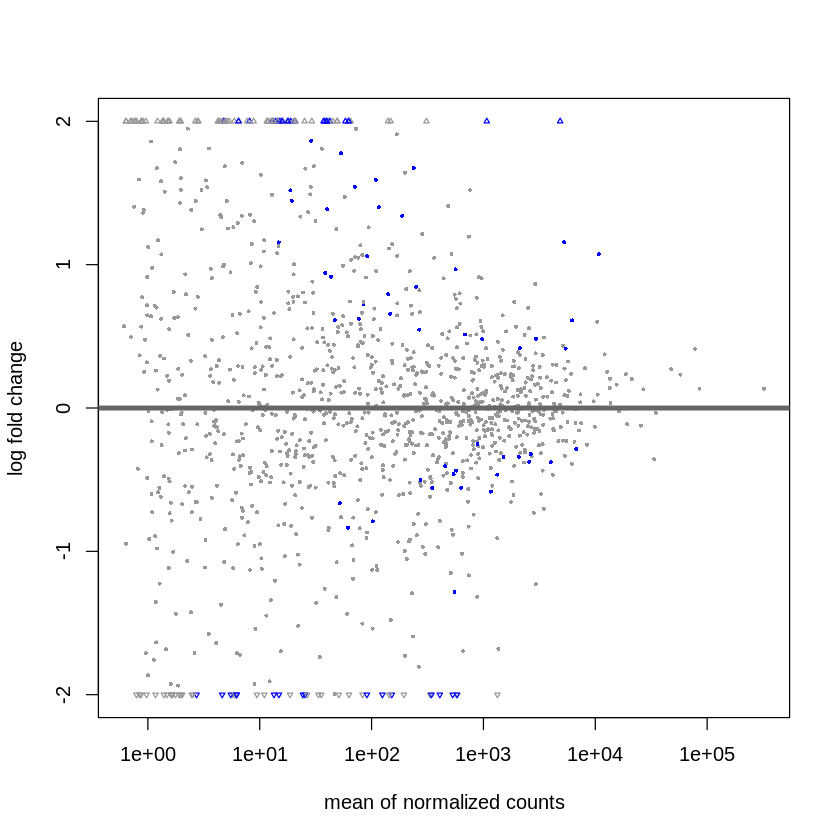

In [ ]:
plotMA(res, ylim=c(-2,2))

**Plot a gene count**

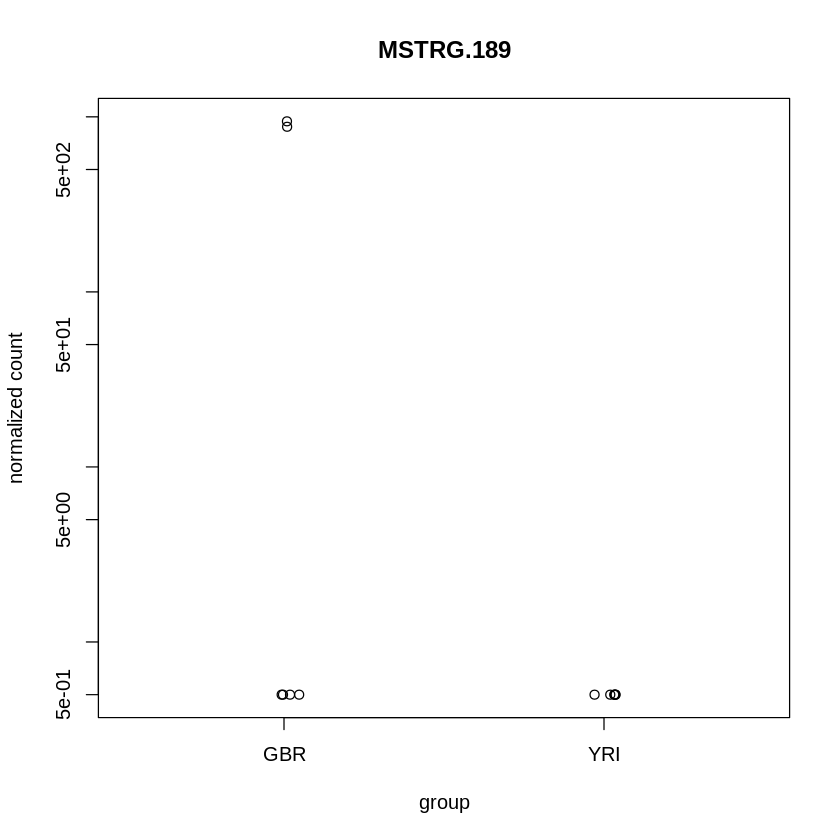

In [ ]:
plotCounts(dds, gene=which.min(res$padj), intgroup="population")

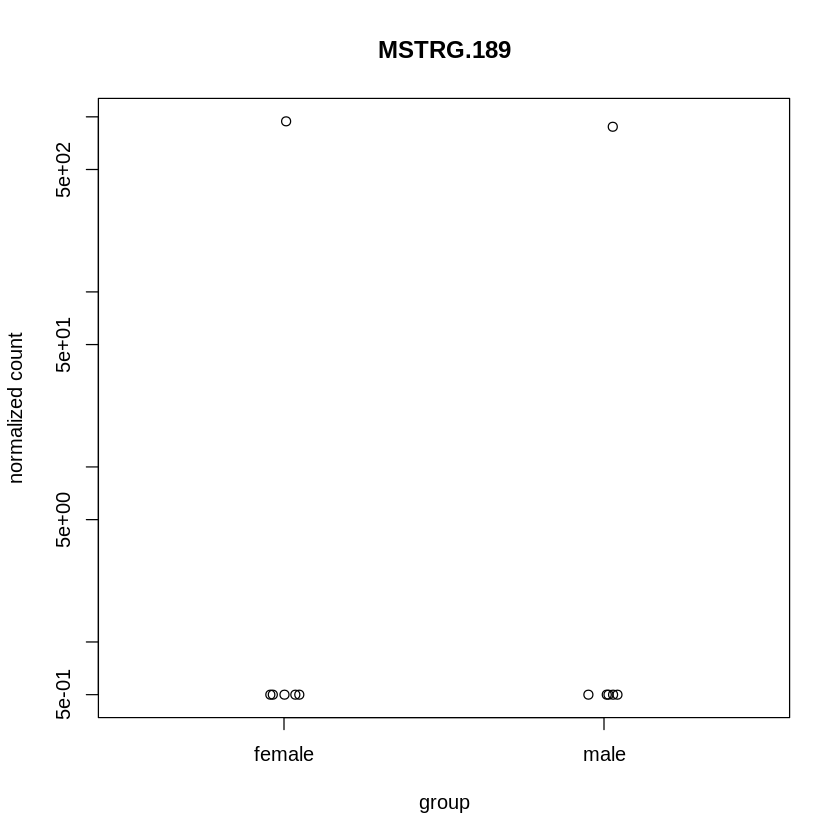

In [ ]:
plotCounts(dds, gene=which.min(res$padj), intgroup="sex")

**For customized plotting, an argument returnData specifies that the function should only return a data.frame for plotting with ggplot.**

In [ ]:
d <- plotCounts(dds, gene=which.min(res$padj), intgroup="population", 
                returnData=TRUE)

In [ ]:
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



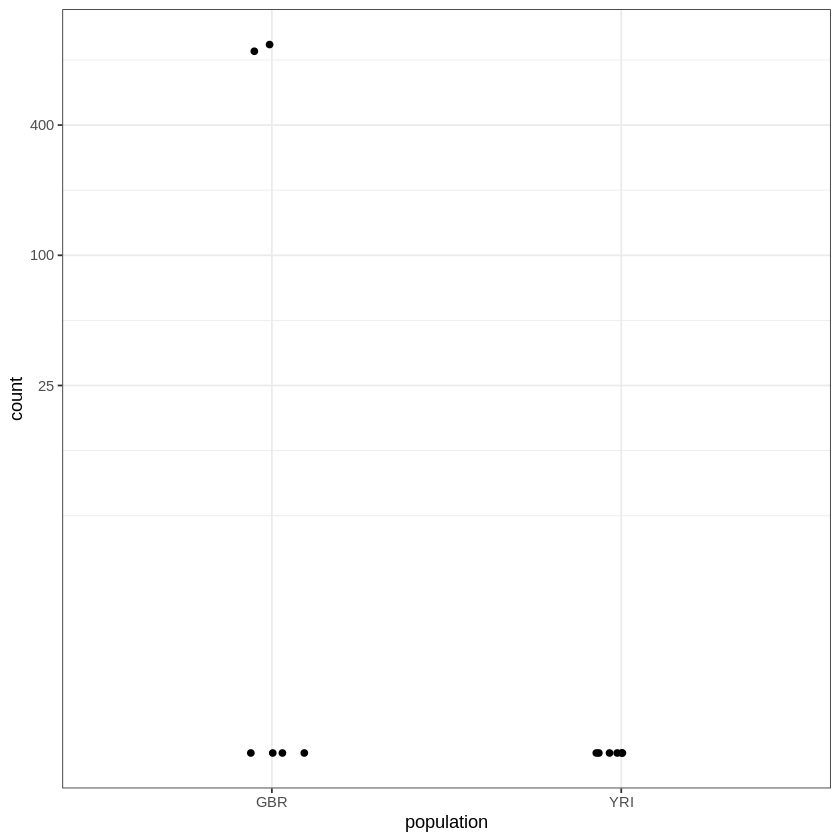

In [ ]:
library("ggplot2")
ggplot(d, aes(x=population, y=count)) + 
  geom_point(position=position_jitter(w=0.1,h=0)) + 
  scale_y_log10(breaks=c(25,100,400))+theme_bw()

In [ ]:
resSig <- subset(resOrdered, padj < 0.1)
resSig

log2 fold change (MLE): population YRI vs GBR 
Wald test p-value: population YRI vs GBR 
DataFrame with 87 rows and 6 columns
                   baseMean log2FoldChange     lfcSE      stat      pvalue
                  <numeric>      <numeric> <numeric> <numeric>   <numeric>
MSTRG.189          151.5872      -25.60157  3.003365  -8.52430 1.53743e-17
MSTRG.708           39.7010       23.05302  3.003927   7.67429 1.66334e-14
MSTRG.622           14.8472      -22.48420  3.005102  -7.48201 7.31948e-14
MSTRG.858          342.8422      -12.19861  2.219118  -5.49705 3.86187e-08
MSTRG.195         5262.9788        1.15714  0.216689   5.34009 9.29030e-08
...                     ...            ...       ...       ...         ...
MSTRG.912|CETN2    884.8947       -0.24992  0.093357  -2.67704  0.00742768
MSTRG.730|IL13RA1  115.8737        1.40013  0.525442   2.66467  0.00770650
MSTRG.675|COL4A5    14.5599        5.20519  1.965143   2.64876  0.00807876
MSTRG.914           39.4430        6.06654  2.288

In [ ]:
write.csv(as.data.frame(resOrdered), 
          file="Population_DEG_results.csv")

**Heatmap of the count matrix**

In [ ]:
install.packages("pheatmap")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
vsd <- vst(dds, blind=FALSE)
rld <- rlog(dds, blind=FALSE)
ntd <- normTransform(dds)

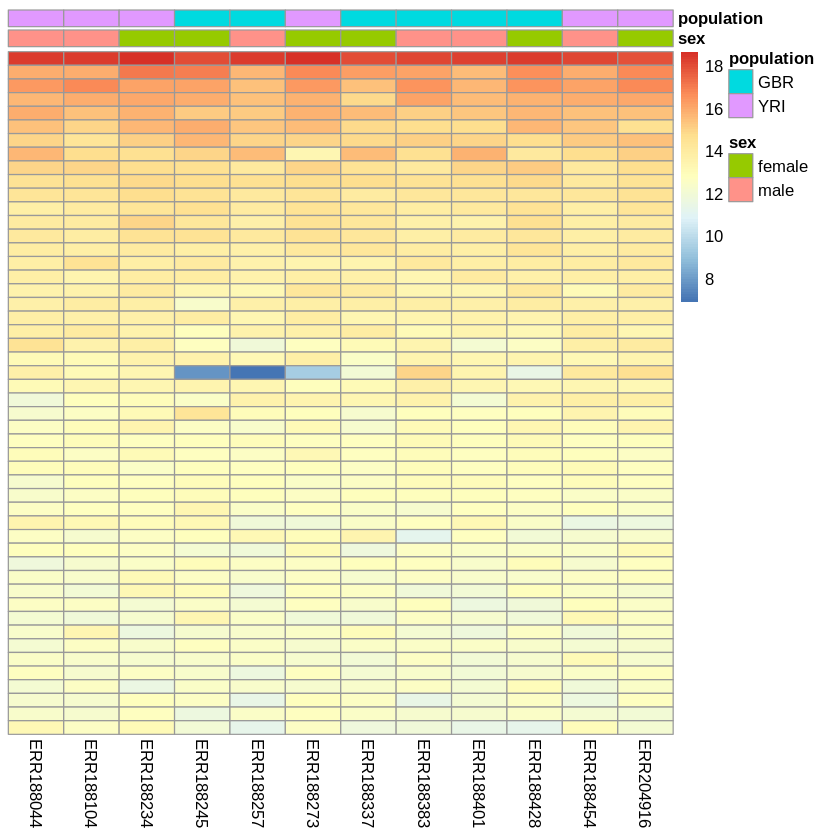

In [ ]:
library("pheatmap")
select <- order(rowMeans(counts(dds,normalized=TRUE)),
                decreasing=TRUE)[1:50]
df <- as.data.frame(colData(dds)[,c("sex","population")])
pheatmap(assay(ntd)[select,], cluster_rows=FALSE, show_rownames=FALSE,
         cluster_cols=FALSE, annotation_col=df)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



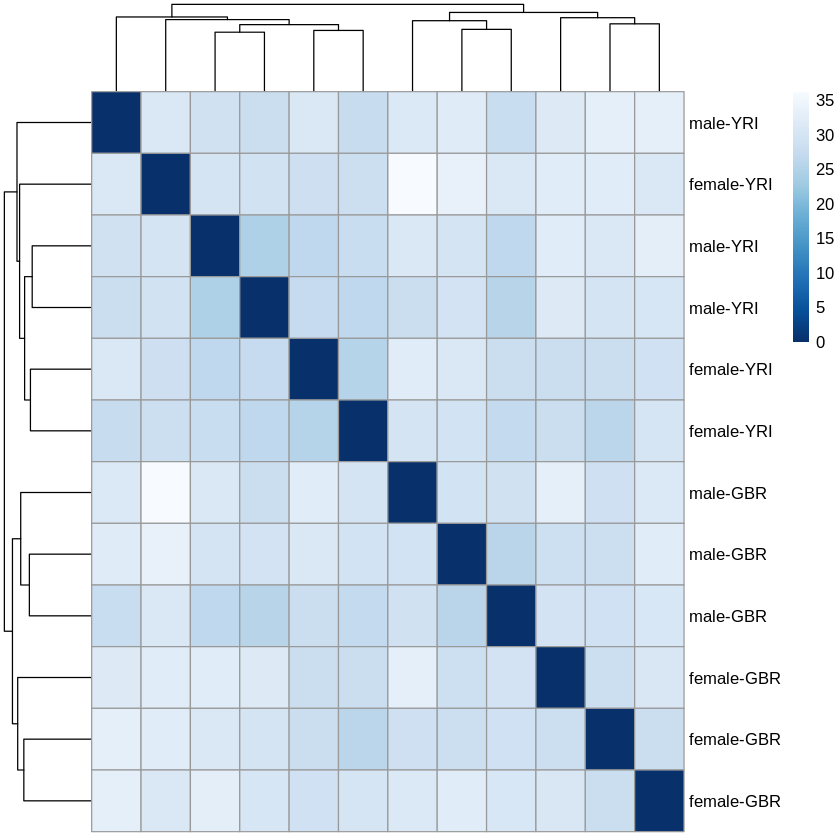

In [ ]:
sampleDists <- dist(t(assay(vsd)))
install.packages("RColorBrewer")
library("RColorBrewer")
sampleDistMatrix <- as.matrix(sampleDists)
rownames(sampleDistMatrix) <- paste(vsd$sex, vsd$population, sep="-")
colnames(sampleDistMatrix) <- NULL
colors <- colorRampPalette( rev(brewer.pal(9, "Blues")) )(255)
pheatmap(sampleDistMatrix,
         clustering_distance_rows=sampleDists,
         clustering_distance_cols=sampleDists,
         col=colors)

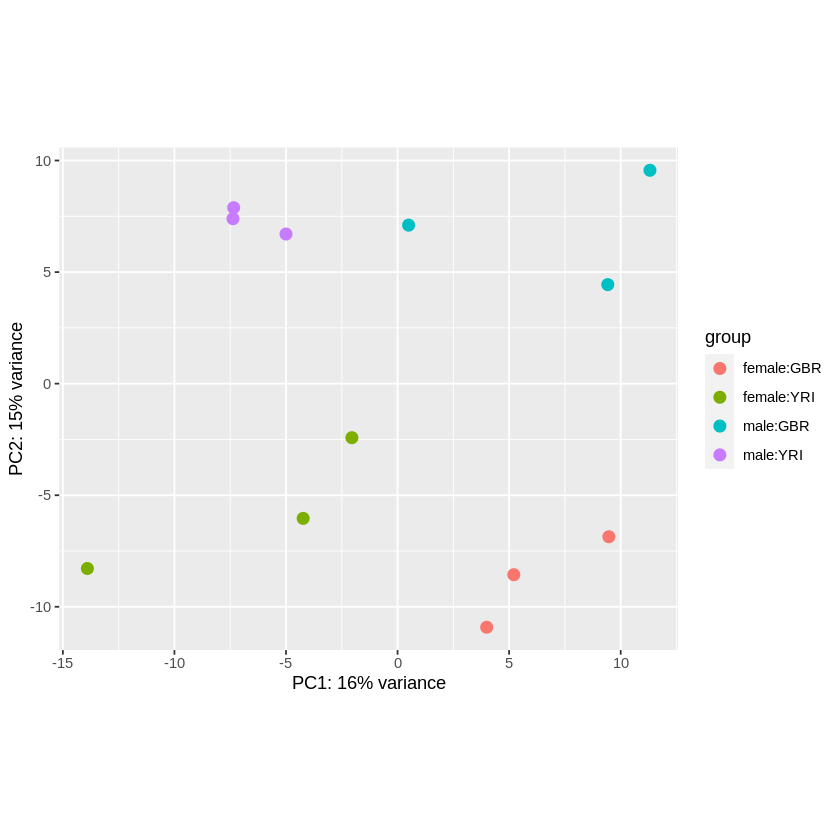

In [ ]:
plotPCA(vsd, intgroup=c("sex", "population"))

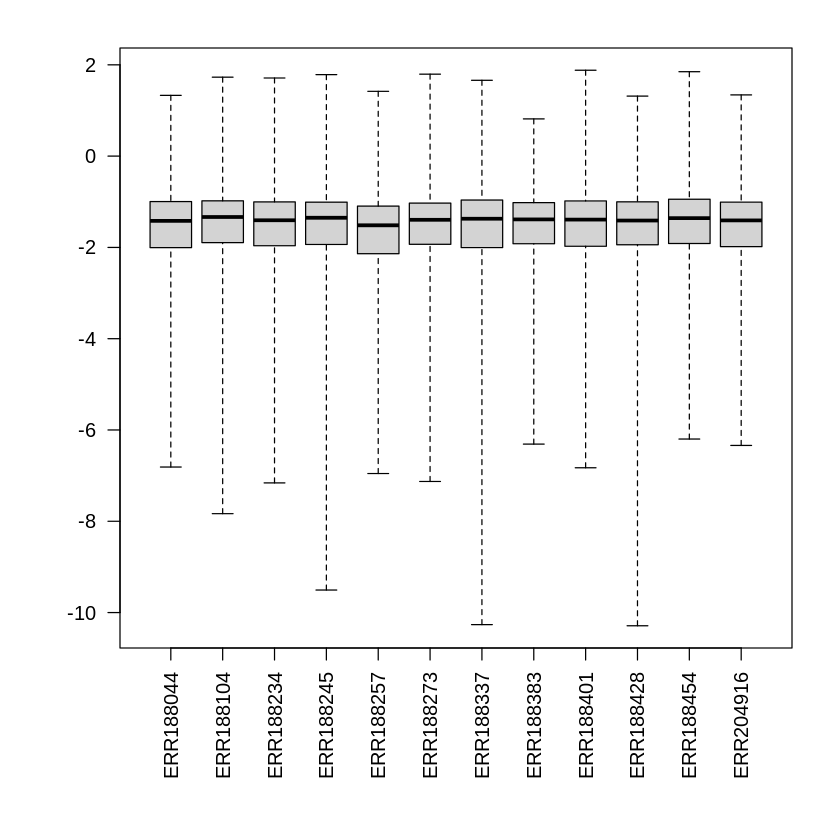

In [ ]:
par(mar=c(8,5,2,2))
boxplot(log10(assays(dds)[["cooks"]]), range=0, las=2)

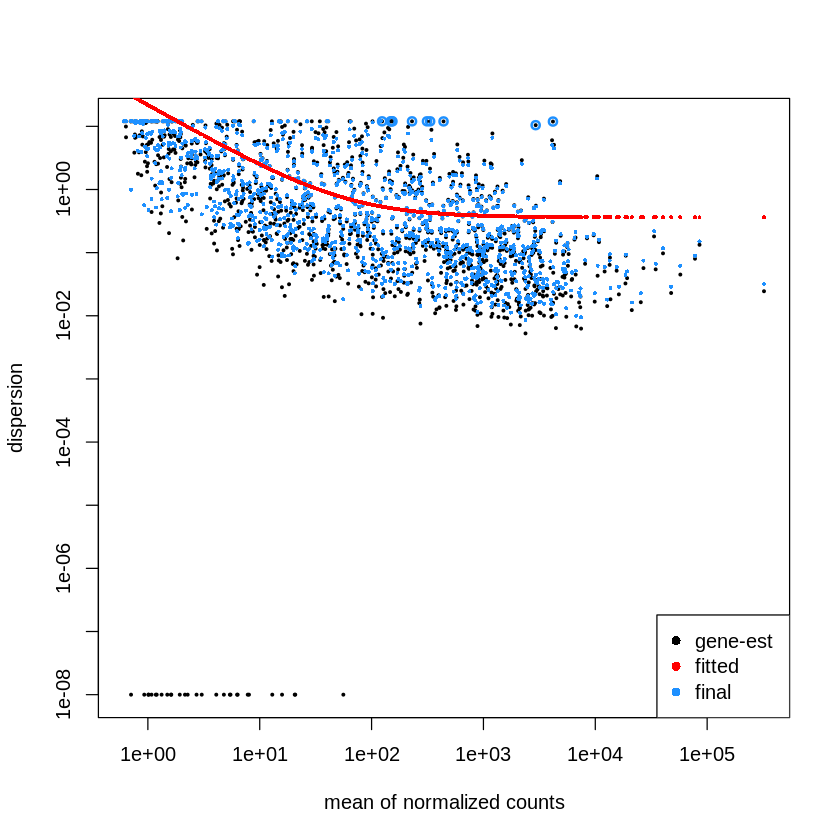

In [ ]:
plotDispEsts(dds)

In [ ]:
resSig <- subset(resOrdered, padj < 0.05 & abs(log2FoldChange)>1)
dim(resSig)
class(as.data.frame(resSig))
write.csv(as.data.frame(resSig),"final_deg.csv",row.names = TRUE,col.names=TRUE)

[1] 34  6

[1] "data.frame"

Warning message in write.csv(as.data.frame(resSig), "final_deg.csv", row.names = TRUE, :
“attempt to set 'col.names' ignored”


In [ ]:
resSig<-as.data.frame(resSig)
resSig$gene_symbol<-rownames(resSig)
rownames(resSig)<-NULL
head(resSig)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene_symbol
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,151.58724,-25.601570,3.0033650,-8.524295,1.537432e-17,1.640440e-14,MSTRG.189
2,39.70102,23.053015,3.0039270,7.674293,1.663339e-14,8.873915e-12,MSTRG.708
3,14.84722,-22.484199,3.0051017,-7.482009,7.319477e-14,2.603294e-11,MSTRG.622
4,342.84218,-12.198613,2.2191179,-5.497055,3.861867e-08,1.030153e-05,MSTRG.858
5,5262.97880,1.157136,0.2166886,5.340085,9.290296e-08,1.982549e-05,MSTRG.195
6,13.42333,-4.437888,0.8367712,-5.303586,1.135497e-07,2.019293e-05,MSTRG.30


# extract significant gene names




In [ ]:
install.packages("tidyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(tidyr)

In [ ]:
resSig_known_gene<-resSig %>% separate(col=gene_symbol,into=c("msrt_id","gene_symbol"),sep="\\s*\\|\\s*", fill="right")


In [ ]:
resSig_known_gene$msrt_id<-NULL

In [ ]:
head(resSig_known_gene)
resSig_final<-resSig_known_gene[!is.na(resSig_known_gene$gene_symbol),]


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene_symbol
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,151.58724,-25.601570,3.0033650,-8.524295,1.537432e-17,1.640440e-14,NA
2,39.70102,23.053015,3.0039270,7.674293,1.663339e-14,8.873915e-12,NA
3,14.84722,-22.484199,3.0051017,-7.482009,7.319477e-14,2.603294e-11,NA
4,342.84218,-12.198613,2.2191179,-5.497055,3.861867e-08,1.030153e-05,NA
5,5262.97880,1.157136,0.2166886,5.340085,9.290296e-08,1.982549e-05,NA
6,13.42333,-4.437888,0.8367712,-5.303586,1.135497e-07,2.019293e-05,NA


In [ ]:
dim(resSig_final)

[1] 13  7

# Enrichment Analysis

In [ ]:
BiocManager::install("clusterProfiler")
BiocManager::install("pathview")
BiocManager::install("enrichplot")
library(clusterProfiler)
library(enrichplot)
# we use ggplot2 to add x axis labels (ex: ridgeplot)
library(ggplot2)

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.15 (BiocManager 1.30.18), R 4.2.0 (2022-04-22)

Installing package(s) 'clusterProfiler'

also installing the dependencies ‘gridGraphics’, ‘tweenr’, ‘polyclip’, ‘RcppEigen’, ‘lazyeval’, ‘gridExtra’, ‘fastmatch’, ‘ggfun’, ‘ggplotify’, ‘patchwork’, ‘ggforce’, ‘ggrepel’, ‘viridis’, ‘tidygraph’, ‘graphlayouts’, ‘ape’, ‘tidytree’, ‘treeio’, ‘DO.db’, ‘fgsea’, ‘reshape2’, ‘aplot’, ‘ggraph’, ‘igraph’, ‘scatterpie’, ‘shadowtext’, ‘ggtree’, ‘downloader’, ‘DOSE’, ‘enrichplot’, ‘GO.db’, ‘GOSemSim’, ‘plyr’, ‘qvalue’, ‘yulab.utils’


Old packages: 'devtools', 'htmltools', 'pillar', 'roxygen2', 'tibble',
  'tidyverse', 'nlme'

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.15 (BiocMan

In [ ]:
# SET THE DESIRED ORGANISM HERE
organism = "org.Dm.eg.db"
BiocManager::install(organism, character.only = TRUE)
library(organism, character.only = TRUE)

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.15 (BiocManager 1.30.18), R 4.2.0 (2022-04-22)

Installing package(s) 'org.Dm.eg.db'

Old packages: 'devtools', 'htmltools', 'pillar', 'roxygen2', 'tibble',
  'tidyverse', 'nlme'





In [ ]:
gene_list <-resSig_final$gene_symbol

In [ ]:
gene_list = sort(gene_list, decreasing = TRUE)

In [ ]:
gse <- gseGO(geneList=gene_list, 
             ont ="ALL", 
             keyType = "GENENAME", 
             nPerm = 10000, 
             minGSSize = 3, 
             maxGSSize = 800, 
             pvalueCutoff = 0.05, 
             verbose = TRUE, 
             OrgDb = organism, 
             pAdjustMethod = "fdr")

preparing geneSet collections...

--> Expected input gene ID: fraenkel,Decapping protein 2,H15,Bicaudal D,Secretory 6,Dynein intermediate chain at 61B



ERROR: ignored

In [ ]:
require(DOSE)
dotplot(gse, showCategory=10, split=".sign") + facet_grid(.~.sign)

In [ ]:
ridgeplot(gse) + labs(x = "enrichment distribution")